In [19]:
import sys
import time
import numpy as np
import pickle
import dask

sys.path.append("/Users/martinedh/Documents/NTNU/GitHub/FysMat/Prosjektoppgave")
from main import run_eigh_calc, solve_and_test_small_system
from main import f as fa
from solve_hamiltonian import solve_system

In [2]:
def save_array(x, filename):
    np.savez(filename, x)
    
def save_system(system, filename):
    with open(filname, 'wb') as output:
        pickle.dump(system, output, pickle.HIGHEST_PROTOCOL)

In [3]:
#%%time
#s = run_eigh_calc()

In [4]:
def f(a):
    for i in range(500):
        np.linalg.eigh(a)
    return a

In [5]:
def make():
    return np.random.random((400,400))

In [35]:
%%time

tmp = make()
f(tmp)

CPU times: user 31.6 s, sys: 321 ms, total: 31.9 s
Wall time: 13.5 s


array([[0.38017739, 0.08846255, 0.25847589, ..., 0.42639465, 0.26629799,
        0.78897687],
       [0.3530591 , 0.06594923, 0.28657377, ..., 0.11033359, 0.16148347,
        0.08949095],
       [0.90358323, 0.59572627, 0.9140682 , ..., 0.67687344, 0.79526186,
        0.30138716],
       ...,
       [0.86766289, 0.00821208, 0.31317183, ..., 0.53485164, 0.15304416,
        0.47952861],
       [0.16975747, 0.03815201, 0.47382742, ..., 0.91136519, 0.25779051,
        0.573442  ],
       [0.5819964 , 0.97078813, 0.64375378, ..., 0.8652685 , 0.68611545,
        0.83976255]])

<h4> Dask

In [6]:
# https://www.youtube.com/watch?v=wANQkgDuTAk

from dask.distributed import Client, LocalCluster, fire_and_forget

In [7]:
#  client.restart

In [8]:
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:53610 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [9]:
client.upload_file('../main.py')

{'tcp://127.0.0.1:53638': {'status': 'OK'},
 'tcp://127.0.0.1:53639': {'status': 'OK'},
 'tcp://127.0.0.1:53640': {'status': 'OK'},
 'tcp://127.0.0.1:53641': {'status': 'OK'}}

In [13]:
%%time
for i in range(300):
    b = client.submit(make, pure=False)
    b = client.submit(f, b)

CPU times: user 390 ms, sys: 25.1 ms, total: 415 ms
Wall time: 511 ms


In [14]:
further = client.submit(save_array, b, 'test_b.npz')
fire_and_forget(further)

In [15]:
npzfile = np.load('test_b.npz')
print(npzfile['arr_0'])

[[0.17060627 0.76567439 0.69370602 ... 0.98350576 0.32943314 0.38166365]
 [0.13860078 0.27766918 0.17789492 ... 0.26807177 0.40277897 0.72584644]
 [0.55171849 0.5419945  0.06791346 ... 0.23407122 0.9466576  0.66179687]
 ...
 [0.00724828 0.56509829 0.85704935 ... 0.8581974  0.20303728 0.42058771]
 [0.57294294 0.18003746 0.29893559 ... 0.65091388 0.24574188 0.08359315]
 [0.36461032 0.77222524 0.13474196 ... 0.53007279 0.10954702 0.27348852]]


In [24]:
client.upload_file('../main.py')

{'tcp://127.0.0.1:53638': {'status': 'OK'},
 'tcp://127.0.0.1:53639': {'status': 'OK'},
 'tcp://127.0.0.1:53640': {'status': 'OK'},
 'tcp://127.0.0.1:53641': {'status': 'OK'}}

In [31]:
%%time


s = client.submit(run_eigh_calc, pure=False)
#f = client.submit(solve_and_test_small_system, pure=False)
#further = client.submit(save_array,s,'test_dask_new.npz')
#further = client.submit(save_system,s,'test_dask.pkl')
#fire_and_forget(further)

CPU times: user 12.7 ms, sys: 619 µs, total: 13.3 ms
Wall time: 15.8 ms


In [33]:
s.visualize()

AttributeError: 'Future' object has no attribute 'visualize'

In [37]:
s.result().compute()

0.0006539821624755859

In [8]:
from plots import plot_pairing_amplitude

with open('test_data.pkl', 'rb') as input:
    system = pickle.load(input)
    plot_pairing_amplitude(system, system.F_matrix) 

FileNotFoundError: [Errno 2] No such file or directory: 'test_data.pkl'

In [17]:
npzfile = np.load('test_b.npz')
tmp_arr = npzfile['arr_0']

client.compute(f(tmp_arr))

array([[0.75346255, 0.43144758, 0.39753756, ..., 0.37180816, 0.3154787 ,
        0.37073172],
       [0.87013471, 0.33935969, 0.22450392, ..., 0.48990362, 0.66429101,
        0.50986253],
       [0.90021706, 0.36537139, 0.33114663, ..., 0.2389507 , 0.58210728,
        0.29782269],
       ...,
       [0.16145322, 0.87557921, 0.72127074, ..., 0.02031783, 0.13263909,
        0.60224476],
       [0.04552556, 0.03473644, 0.81074991, ..., 0.67336748, 0.70144348,
        0.59678327],
       [0.2341042 , 0.29883577, 0.60400434, ..., 0.28912387, 0.48898845,
        0.83098397]])

In [38]:
%%time
#t = client.submit(run_eigh_calc)
tt = client.compute(run_eigh_calc())

CPU times: user 17.7 ms, sys: 806 µs, total: 18.5 ms
Wall time: 20.2 ms


In [39]:
tt.result()

0.0009522438049316406

In [40]:
tt

<Future: finished, type: builtins.float, key: run_eigh_calc-bd1318f2-fe67-42eb-bf3b-e5dc32aa6d6a>

In [41]:
%%time
f = dask.delayed(solve_and_test_small_system)()
#f = client.submit(solve_and_test_small_system())

CPU times: user 1.55 ms, sys: 163 µs, total: 1.71 ms
Wall time: 1.88 ms


In [42]:
f

Delayed('solve_and_test_small_system-ee98b440-4a02-4759-bea0-797c68234cf0')

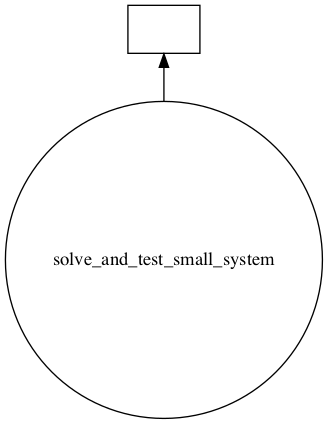

In [43]:
f.visualize()

In [44]:
f.compute()

array([[0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.3+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took

In [14]:
f_matrix = f.compute()

In [15]:
f_matrix[:,0]

array([0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j,
       0.3+0.j, 0.3+0.j, 0.3+0.j, 0.3+0.j])

In [16]:
import matplotlib.pyplot as plt

In [17]:
x = np.linspace(1,len(f_matrix[:,0]), len(f_matrix[:,0]))

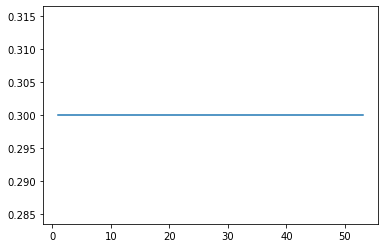

In [18]:
plt.plot(x,np.real(f_matrix[:,0]))